In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [27]:
E_commerce_data = pd.read_csv("F:\\@BDA\\PDS\\PROJECT\\SURVEY_DATA_ON_ECOMMERCE_SITES.csv")

In [28]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)":"C_service"}, axis = 1)

In [29]:
data = pd.DataFrame(columns=["Gender", "Customer_Service"])

In [30]:
data.Gender = E_commerce_data.Gender
data.Customer_Service = E_commerce_data.C_service
data

,Gender,Customer_Service
0,Male,4
1,Male,4
2,Male,5
3,Male,3
4,Male,5
...,...,...
121,Male,4
122,Female,4
123,Female,5
124,Female,4


In [31]:
data["val"] = 1; data

,Gender,Customer_Service,val
0,Male,4,1
1,Male,4,1
2,Male,5,1
3,Male,3,1
4,Male,5,1
...,...,...,...
121,Male,4,1
122,Female,4,1
123,Female,5,1
124,Female,4,1


In [32]:
df = pd.DataFrame(data.groupby(["Gender", "Customer_Service"]).sum()); df

val
Gender Customer_Service     
Female 2                   1
       3                  11
       4                  22
       5                   6
Male   0                   1
       1                   1
       2                   1
       3                  15
       4                  51
       5                  17

In [33]:
df2 = df.groupby("Gender").sum(); df2

,val
Gender,
Female,40
Male,86


In [34]:
data2 = pd.DataFrame(columns=["Gender", "Rating"])
row_list = []
for i,j in df.index:
    dict1 = {}
    dict1.update({"Gender": i, "Rating":j})
    row_list.append(dict1)
df1 = pd.DataFrame(row_list); df1
    

,Gender,Rating
0,Female,2
1,Female,3
2,Female,4
3,Female,5
4,Male,0
5,Male,1
6,Male,2
7,Male,3
8,Male,4
9,Male,5


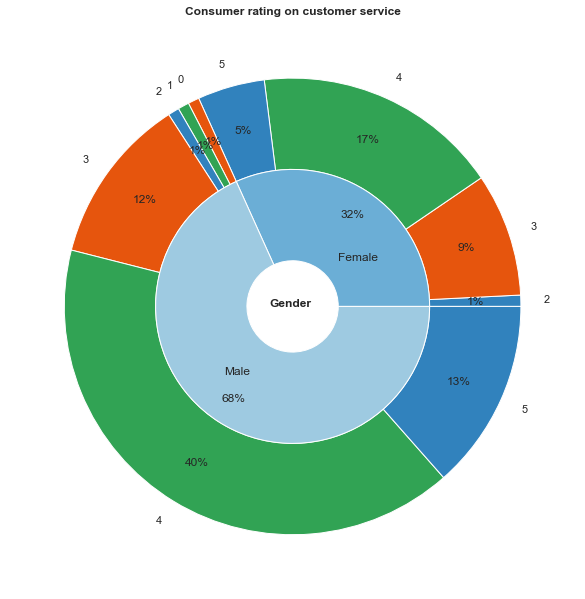

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5, forward = True)
size = 0.4
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(df.val, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels = df1.Rating, autopct = "%1.0f%%",
      pctdistance = 0.8)

ax.pie(df2.val, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct = "%1.0f%%",
      pctdistance = 0.8)

plt.title('Consumer rating on customer service', fontweight = "bold")
ax.text(0.2,0.2,"Female")
ax.text(-0.1,0,"Gender", fontweight = "bold")
ax.text(-0.3,-0.3,"Male")
plt.show()

fig.savefig('11.png',facecolor='lightgrey',transparent=True)